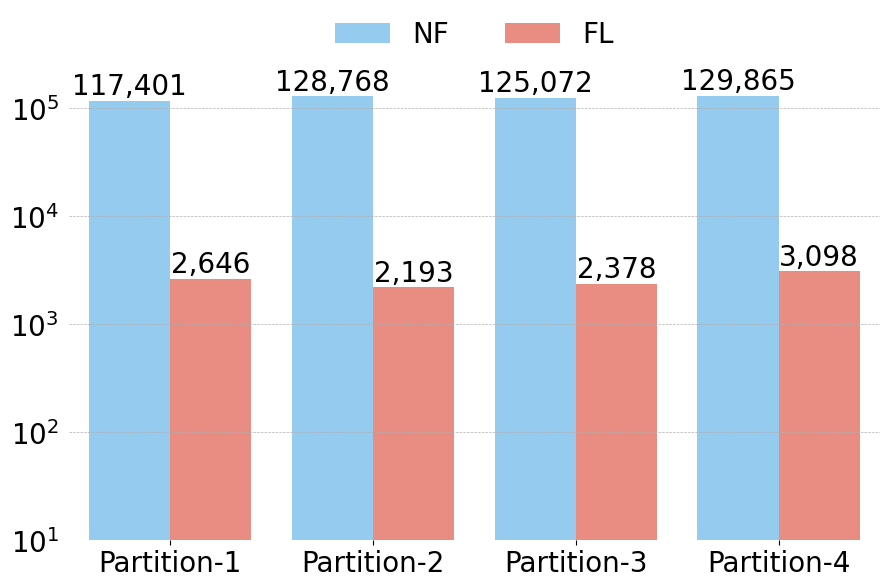

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Define file paths
part1 = '../data_labeling/tr_te_val/data/-90_to_90/Fold1_test.csv'
part2 = '../data_labeling/tr_te_val/data/-90_to_90/Fold2_test.csv'
part3 = '../data_labeling/tr_te_val/data/-90_to_90/Fold3_test.csv'
part4 = '../data_labeling/tr_te_val/data/-90_to_90/Fold4_test.csv'

# Read data from CSV files
df_part1 = pd.read_csv(part1)
df_part2 = pd.read_csv(part2)
df_part3 = pd.read_csv(part3)
df_part4 = pd.read_csv(part4)
fontsize=20

# Add a 'Partition' column to each dataframe
df_part1['Partition'] = 'Partition-1'
df_part2['Partition'] = 'Partition-2'
df_part3['Partition'] = 'Partition-3'
df_part4['Partition'] = 'Partition-4'

# Concatenate the dataframes vertically
df_combined = pd.concat([df_part1, df_part2, df_part3, df_part4])

# Get the value counts of 'label' for each partition
counts = df_combined.groupby(['Partition', 'label']).size().unstack(fill_value=0)

# Reset index to make 'Partition' a column
counts = counts.reset_index()

skyblue_rgb = (0.529, 0.808, 1.0)  # RGB for skyblue
salmon_rgb = (0.98, 0.502, 0.447)   # RGB for salmon

# Melt the DataFrame to have a column for each label
counts_melted = counts.melt(id_vars='Partition', var_name='Label', value_name='Count')

# Plotting with Seaborn
plt.figure(figsize=(9, 6))
ax = sns.barplot(data=counts_melted, x='Partition', y='Count', hue='Label', palette=[skyblue_rgb, salmon_rgb])
# plt.xlabel('Tri-monthly Partitions', fontsize=15)
plt.xlabel(None)
plt.ylabel(None)

# Customizing legends
leg = plt.legend(fontsize=fontsize, loc='upper center', frameon=False, bbox_to_anchor=(0.5, 1.2), ncol=2)  # Horizontal legend
# Set legend labels
leg_labels = ['NF', 'FL']
for text, label in zip(leg.texts, leg_labels):
    text.set_text(label)

plt.xticks(rotation=0, fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Add commas to the values of the bars
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.yscale('log')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.yticks([10**i for i in range(1, 6)])  # Adjust range as needed
plt.tick_params(left=False, which='both')

# Annotate actual values on top of bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ','), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=fontsize)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig("partition.pdf", format="pdf", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


/tmp/ipykernel_99028/1871558591.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(combined_data.keys()), y=list(combined_data.values()), palette=colors, dodge=False, width=0.63)


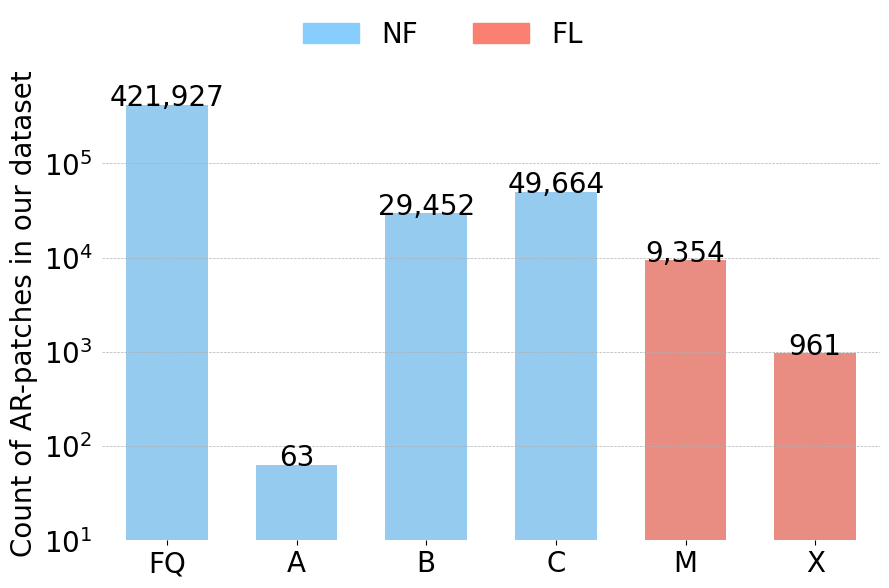

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

NF_data = {'FQ': 421927, 'A': 63, 'B': 29452, 'C': 49664}
FL_data = {'M': 9354, 'X': 961}
plt.figure(figsize=(9, 6))

# Define colors
skyblue_rgb = (0.529, 0.808, 1.0)  # RGB for skyblue
salmon_rgb = (0.98, 0.502, 0.447)    # RGB for salmon

# Create a list of colors for NF_data and FL_data
colors = [skyblue_rgb] * len(NF_data) + [salmon_rgb] * len(FL_data)

# Combine NF_data and FL_data for plotting
combined_data = {**NF_data, **FL_data}

# Plotting using seaborn
ax = sns.barplot(x=list(combined_data.keys()), y=list(combined_data.values()), palette=colors, dodge=False, width=0.63)

# Add actual values to the top of the bar
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ','), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=fontsize)

# Set y-axis label
plt.ylabel('Count of AR-patches in our dataset', fontsize=fontsize)

# Set x-axis label
plt.xlabel(None)
# Add commas to the values of the y-axis
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Set log scale for y-axis
plt.yscale('log')

# Remove vertical gridlines
ax.xaxis.grid(False)

# Set dashed gridlines
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)

# Create legend handles
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip([skyblue_rgb, salmon_rgb], ['NF', 'FL'])]
plt.yticks([10**i for i in range(1, 6)])
# Add legend
plt.legend(handles=legend_handles, fontsize=fontsize, loc='upper right', frameon=False, bbox_to_anchor=(0.65, 1.2), ncol=2)
plt.tick_params(left=False, which='both')
# Remove the border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Increase xtick and ytick font size
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)



# Show the plot
plt.tight_layout()
plt.savefig("data.pdf", format="pdf", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


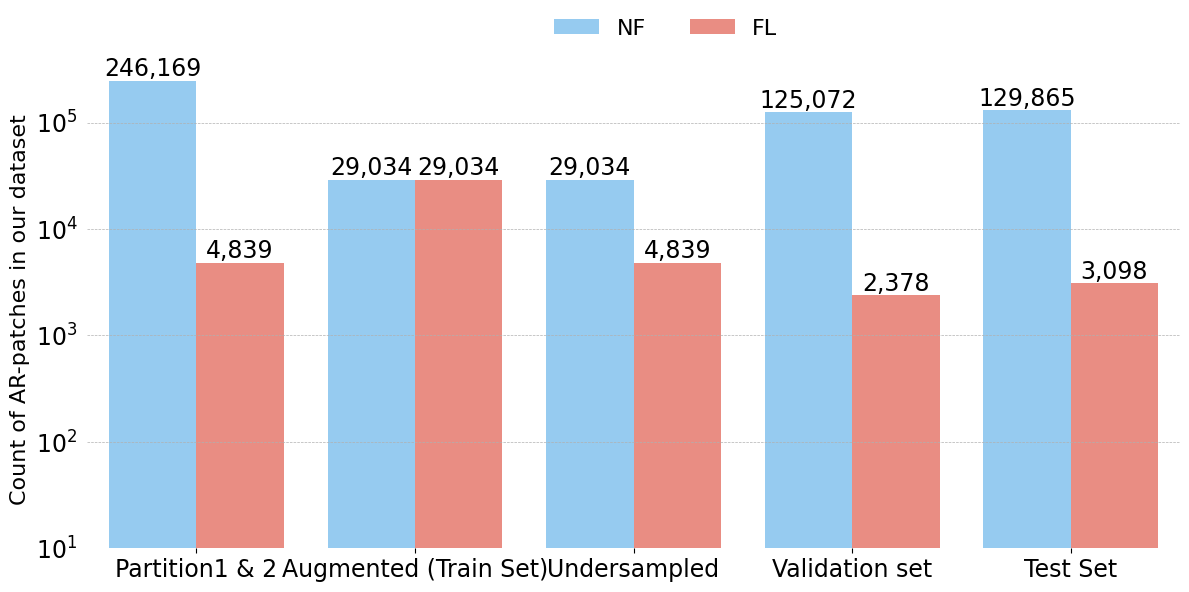

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

# Define your data
data = {
    "Partition1 & 2": {"NF": 246169, "FL": 4839},
    "Augmented (Train Set)": {"NF": 29034, "FL": 29034},
    "Undersampled": {"NF": 29034, "FL": 4839},
    "Validation set": {"NF": 125072, "FL": 2378},
    "Test Set": {"NF": 129865, "FL": 3098}
}

# Convert the data to a DataFrame
df = pd.DataFrame(data).T.reset_index().rename(columns={"index": "Partition"})

# Melt the DataFrame to have a column for each label
counts_melted = df.melt(id_vars='Partition', var_name='Label', value_name='Count')

# Define RGB values for the colors
skyblue_rgb = (0.529, 0.808, 1.0)  # RGB for skyblue
salmon_rgb = (0.98, 0.502, 0.447)     # RGB for salmon

# Plotting with Seaborn
plt.figure(figsize=(12, 6))  # Same figsize as Plot 1
sns.barplot(data=counts_melted, x='Partition', y='Count', hue='Label', palette=[skyblue_rgb, salmon_rgb])

# Set x-axis label
plt.xlabel('Partitions', fontsize=14)  # Same fontsize as Plot 1

# Set y-axis label
plt.ylabel('Count of AR-patches in our dataset', fontsize=16)  # Same fontsize as Plot 1

# Add commas to the values of the y-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Annotate actual values on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(format(int(p.get_height()), ','), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=17)  # Same fontsize as Plot 1

# Customizing legends
leg = plt.legend(fontsize=16, loc='upper right', frameon=False, bbox_to_anchor=(0.65, 1.15), ncol=2)  # Same fontsize as Plot 1
leg.set_alpha(0.6)  # Set transparency of legend
leg_labels = ['NF', 'FL']

for text, label in zip(leg.texts, leg_labels):
    text.set_text(label)

# Set log scale for y-axis
plt.yscale('log')

# Remove vertical gridlines
plt.gca().xaxis.grid(False)

# Set dashed gridlines
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)

# Remove the border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, which='both')
plt.yticks([10**i for i in range(1, 6)])
# Increase xtick and ytick font size
plt.xticks(fontsize=17)  # Same fontsize as Plot 1
plt.yticks(fontsize=17)  # Same fontsize as Plot 1
plt.xlabel(None)

plt.tight_layout()
plt.savefig("dataset.pdf", format="pdf", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()
